In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## 📂Import Result ResNet Original Model

In [3]:
df_original = pd.read_csv("/home/kannika/codes_AI/CSV/ResNet152v2_MLorigin_USAI_unfreeze_conv3_block-conv5_block-R2_unbalanced.csv")
print(df_original.shape)
df_original.head()

(1312, 31)


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Case,Abs Position,Sub Position,Class,Path Full,Path Crop,Views,...,Sub_class_New,tag_AjNit,tag_AjWan,Test150,Spilt,Sub_Position_New,filename,Sub_Position_Label,category,Prob
0,0,0,111,40,P1,P1,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/HDD/VISION_dataset/USAI/ABnormal01/1 AB...,FP-A,...,AB01,NaN,NaN,False,Test,P1,AB01 P1 C040.JPG,P1,AB02,0.999999
1,1,1,112,40,P2,P2,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/HDD/VISION_dataset/USAI/ABnormal01/1 AB...,FP-A,...,AB01,NaN,NaN,False,Test,P2,AB01 P2 C040.JPG,P2,AB01,0.999891
2,2,2,113,40,P4,P41,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/HDD/VISION_dataset/USAI/ABnormal01/1 AB...,FP-B,...,AB01,NaN,NaN,False,Test,P4,AB01 P4-1 C040.JPG,P4,AB01,0.999999
3,3,3,114,40,P5,P51,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/HDD/VISION_dataset/USAI/ABnormal01/1 AB...,FP-C,...,AB01,NaN,NaN,False,Test,P6,AB01 P5-1 C040.JPG,P6,AB02,0.962363
4,4,4,115,40,P3,P31,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/HDD/VISION_dataset/USAI/ABnormal01/1 AB...,FP-B,...,AB01,NaN,NaN,False,Test,P3,AB01 P3-1 C040.JPG,P3,AB02,0.711341


Text(0.5, 21.249999999999993, 'Predicted label')

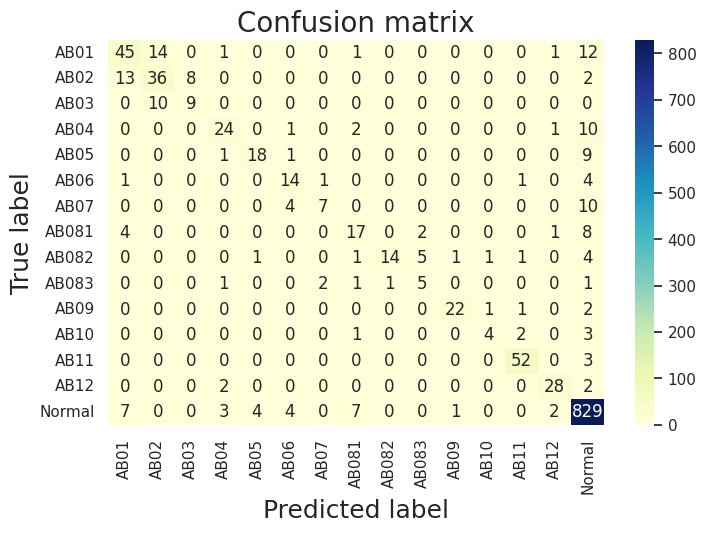

In [4]:
#create CF 
act = df_original['Sub_class_New'].array
pred = df_original['category'].array

data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## 📂Import Result ResNet152v2 Unlearn - unfreeze conv3_block - conv5_block (conv3_block - conv5_block & FC)

In [5]:
df_unlearn = pd.read_csv("/home/kannika/codes_AI/CSV/ResNet152v2_Unlearn_USAI_unfreeze_conv3_block-conv5_block-R2_unbalanced.csv")
print(df_unlearn.shape)
df_unlearn.head()

(1312, 31)


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Case,Abs Position,Sub Position,Class,Path Full,Path Crop,Views,...,Sub_class_New,tag_AjNit,tag_AjWan,Test150,Spilt,Sub_Position_New,filename,Sub_Position_Label,category,Prob
0,0,0,111,40,P1,P1,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/HDD/VISION_dataset/USAI/ABnormal01/1 AB...,FP-A,...,AB01,NaN,NaN,False,Test,P1,AB01 P1 C040.JPG,P1,AB02,0.999411
1,1,1,112,40,P2,P2,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/HDD/VISION_dataset/USAI/ABnormal01/1 AB...,FP-A,...,AB01,NaN,NaN,False,Test,P2,AB01 P2 C040.JPG,P2,AB01,0.972302
2,2,2,113,40,P4,P41,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/HDD/VISION_dataset/USAI/ABnormal01/1 AB...,FP-B,...,AB01,NaN,NaN,False,Test,P4,AB01 P4-1 C040.JPG,P4,AB01,0.996897
3,3,3,114,40,P5,P51,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/HDD/VISION_dataset/USAI/ABnormal01/1 AB...,FP-C,...,AB01,NaN,NaN,False,Test,P6,AB01 P5-1 C040.JPG,P6,AB01,0.984641
4,4,4,115,40,P3,P31,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/HDD/VISION_dataset/USAI/ABnormal01/1 AB...,FP-B,...,AB01,NaN,NaN,False,Test,P3,AB01 P3-1 C040.JPG,P3,AB02,1.000000


In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix
act = df_unlearn['Sub_class_New'].array
pred = df_unlearn['category'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 86.4329268292683%
              precision    recall  f1-score   support

        AB01       0.63      0.53      0.57        74
        AB02       0.53      0.53      0.53        59
        AB03       0.57      0.63      0.60        19
        AB04       0.81      0.58      0.68        38
        AB05       0.84      0.72      0.78        29
        AB06       0.80      0.57      0.67        21
        AB07       0.62      0.62      0.62        21
       AB081       0.75      0.66      0.70        32
       AB082       0.83      0.54      0.65        28
       AB083       0.50      0.45      0.48        11
        AB09       1.00      0.85      0.92        26
        AB10       0.86      0.60      0.71        10
        AB11       0.92      0.89      0.91        55
        AB12       0.88      0.94      0.91        32
      Normal       0.92      0.98      0.95       857

    accuracy                           0.86      1312
   macro avg       0.76      0.67      0

Text(0.5, 21.249999999999993, 'Predicted label')

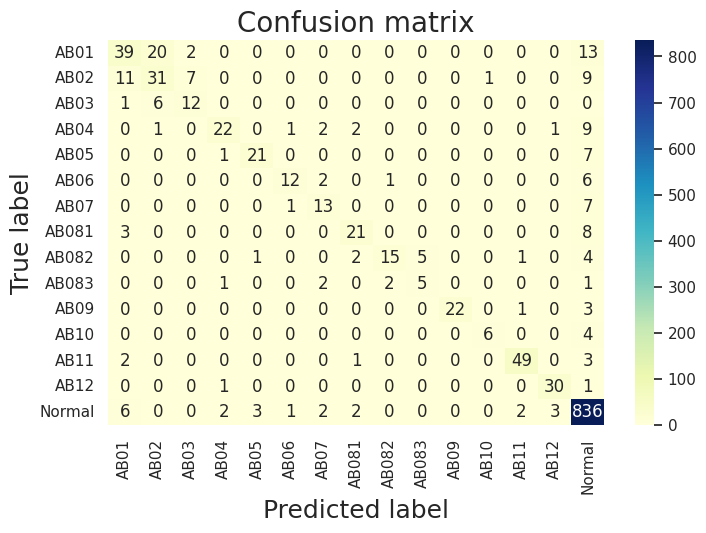

In [7]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

##  ⚙️💡Evaluation

In [8]:
#เช็คคลาสใน Predicted
pred_class_paper = set(df_original['category'])
print(len(pred_class_paper))
print(pred_class_paper)

pred_class_unlearn = set(df_unlearn['category'])
print(len(pred_class_unlearn))
print(pred_class_paper)

15
{'AB05', 'AB06', 'AB09', 'AB081', 'AB07', 'AB03', 'AB082', 'AB11', 'AB083', 'Normal', 'AB02', 'AB10', 'AB12', 'AB04', 'AB01'}
15
{'AB05', 'AB06', 'AB09', 'AB081', 'AB07', 'AB03', 'AB082', 'AB11', 'AB083', 'Normal', 'AB02', 'AB10', 'AB12', 'AB04', 'AB01'}


In [9]:
batch_size = 32
height = width = 456

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      brightness_range=[0.5,1.5],
      shear_range=0.4,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(
        dataframe = df_original,
        directory = None,
        x_col = 'Path Crop',
        y_col = 'Sub_class_New',
        target_size = (height, width),
        batch_size=batch_size,
        color_mode= 'rgb',
        class_mode='categorical')

#label
labels = (train_generator.class_indices)
labels = dict((v,k.replace("C","")) for k,v in labels.items())
print(labels)

2025-02-19 15:55:20.116055: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-19 15:55:20.218827: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-19 15:55:20.746923: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/kannika/miniconda3/envs/tensorflow/lib/
2025-02-19 15:55:20.746975: W tensorflow

Found 1312 validated image filenames belonging to 15 classes.
{0: 'AB01', 1: 'AB02', 2: 'AB03', 3: 'AB04', 4: 'AB05', 5: 'AB06', 6: 'AB07', 7: 'AB081', 8: 'AB082', 9: 'AB083', 10: 'AB09', 11: 'AB10', 12: 'AB11', 13: 'AB12', 14: 'Normal'}


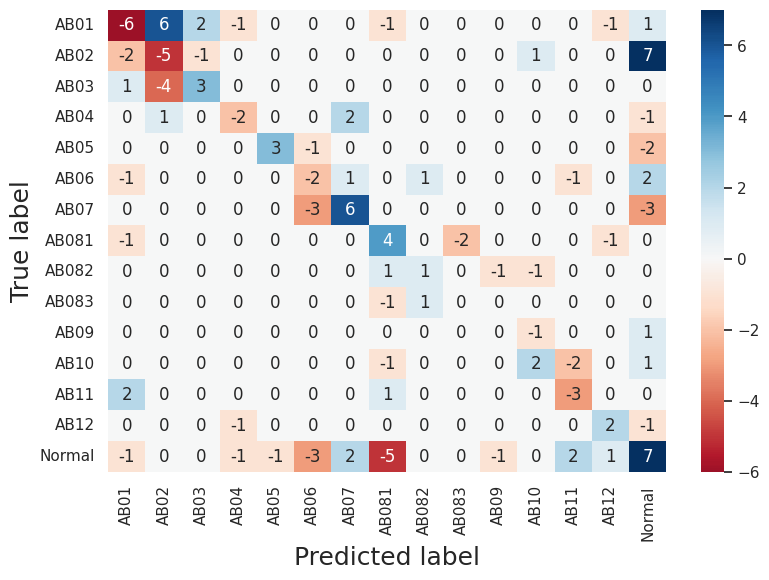

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example class labels (replace these with actual class names)
# class_labels = ['AB01', 'AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082',
#                     'AB083','AB09','AB10','AB11','AB12','Normal']

act = df_original['Sub_class_New'].array
pred_paper = df_original['category'].array
pred_unlearn = df_unlearn['category'].array

class_labels = ['AB01', 'AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082',
                    'AB083','AB09','AB10','AB11','AB12','Normal']

# Compute confusion matrices
cm_base = confusion_matrix(act, pred_paper)
cm_unlearn = confusion_matrix(act, pred_unlearn)

# Compute the difference matrix
cm_diff = cm_unlearn - cm_base

# Plot the confusion matrix difference
plt.figure(figsize=(9, 6))
sns.heatmap(cm_diff, annot=True, fmt="d", cmap="RdBu", center=0, xticklabels=class_labels, yticklabels=class_labels)

ax.set_facecolor('white') 
plt.xlabel("Predicted label", fontsize=18)
plt.ylabel("True label", fontsize=18)
#plt.title("Confusion Matrix Difference of EfficientNet Model (Unlearn - Original)", fontsize=16)
plt.show()